<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:## ML Model Perdiction - Project By Erez Levy - PartV One Hot Encoding and Imbalance teqnics

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Import tmdb_clean as pickel file from my Google Drive

In [1]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_clean = pickle.load(file)
    print(f"tmdb_clean loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_clean.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
tmdb_clean loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl successfully.
              name        id  number_of_seasons  number_of_episodes  \
0          minutes   39280.0                  0                   0   
1              man  222838.6                  1                   5   
2   erne tur retur  222838.6                  1                  10   
3                    34835.0                  1                  12   
4             bama   42598.0                  0                   0   

   vote_count  vote_average first_air_date last_air_date  popularity  \
0           0           0.0            NaT           NaT    0.470004   
1           3           7.7     2023-05-28    2023-06-25    1.723837   
2           0           0.0     2014-05-15    2014-07-17    0.470004   
3          10           6.4     2006-10-06    2006-12-22    2.375928   
4           0           0.0            NaT           NaT    0.470004   

    

# 5. One-Hot Encoding

# Categorial Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   production_companies  82872 non-null  object
 1   networks              82872 non-null  object
 2   languages             82872 non-null  object
 3   genres                82872 non-null  object
 4   origin_country        82872 non-null  object
 5   created_by            82872 non-null  object
 6   type                  82872 non-null  object
dtypes: object(7)
memory usage: 4.4+ MB


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20856 (\N{CJK UNIFIED IDEOGRAPH-5178}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) DejaVu Sans.
  fig.canvas

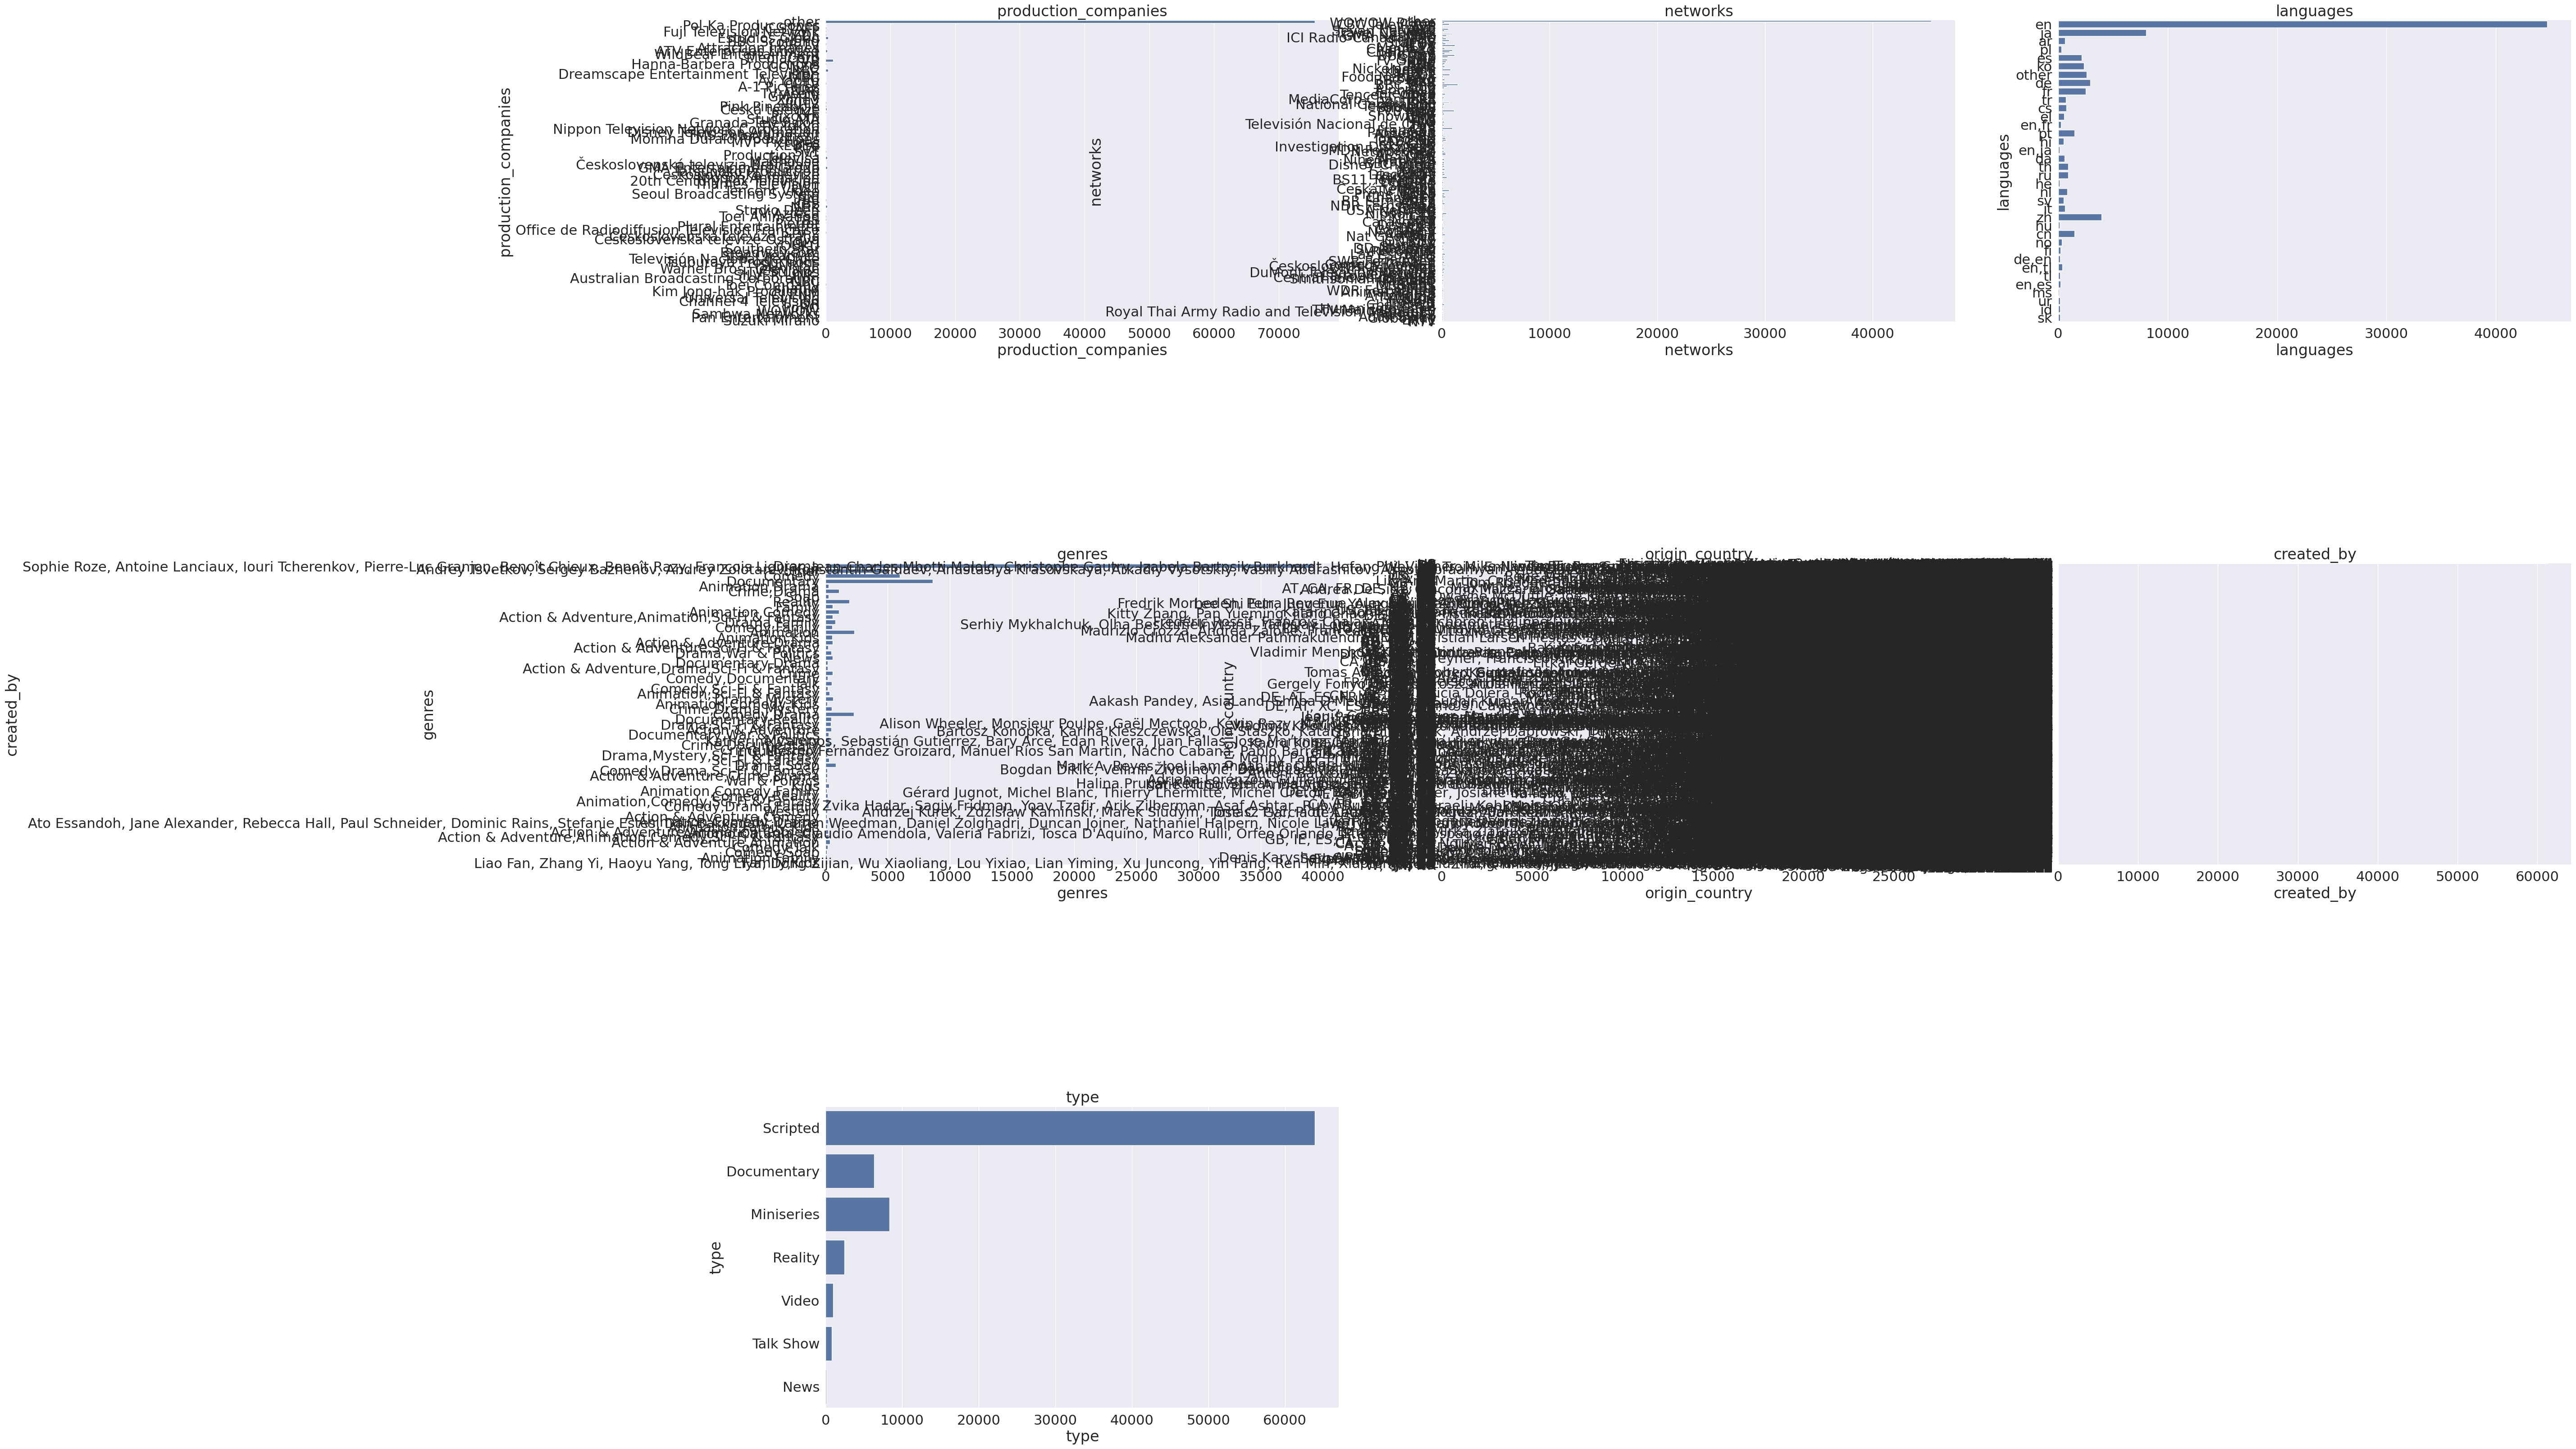

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_list=[ 'production_companies', 'networks','languages','genres', 'origin_country','created_by','type']
tmdb_cat= tmdb_clean[cat_list]
tmdb_cat.info()

a=3 #number of rows
b=3 #number of columns
c=1 #plot counter

fig=plt.figure(figsize=(50,40))
plt.subplots_adjust(hspace = 0.8)
sns.set(font_scale = 2)
for i in tmdb_cat:

    plt.subplot(a,b,c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.countplot(tmdb_cat[i])
    c=c+1

plt.show()

# Numeric (Continue) Analysis

In [3]:
#get all numeric data
#cols=df.columns
tmdb_num=tmdb_clean._get_numeric_data().dropna()
tmdb_num.shape

(82872, 9)

In [4]:
tmdb_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  82872 non-null  float64
 1   number_of_seasons   82872 non-null  int64  
 2   number_of_episodes  82872 non-null  int64  
 3   vote_count          82872 non-null  int64  
 4   vote_average        82872 non-null  float64
 5   popularity          82872 non-null  float64
 6   episode_run_time    82872 non-null  int64  
 7   adult_True          82872 non-null  int64  
 8   air_time            82872 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 5.7 MB


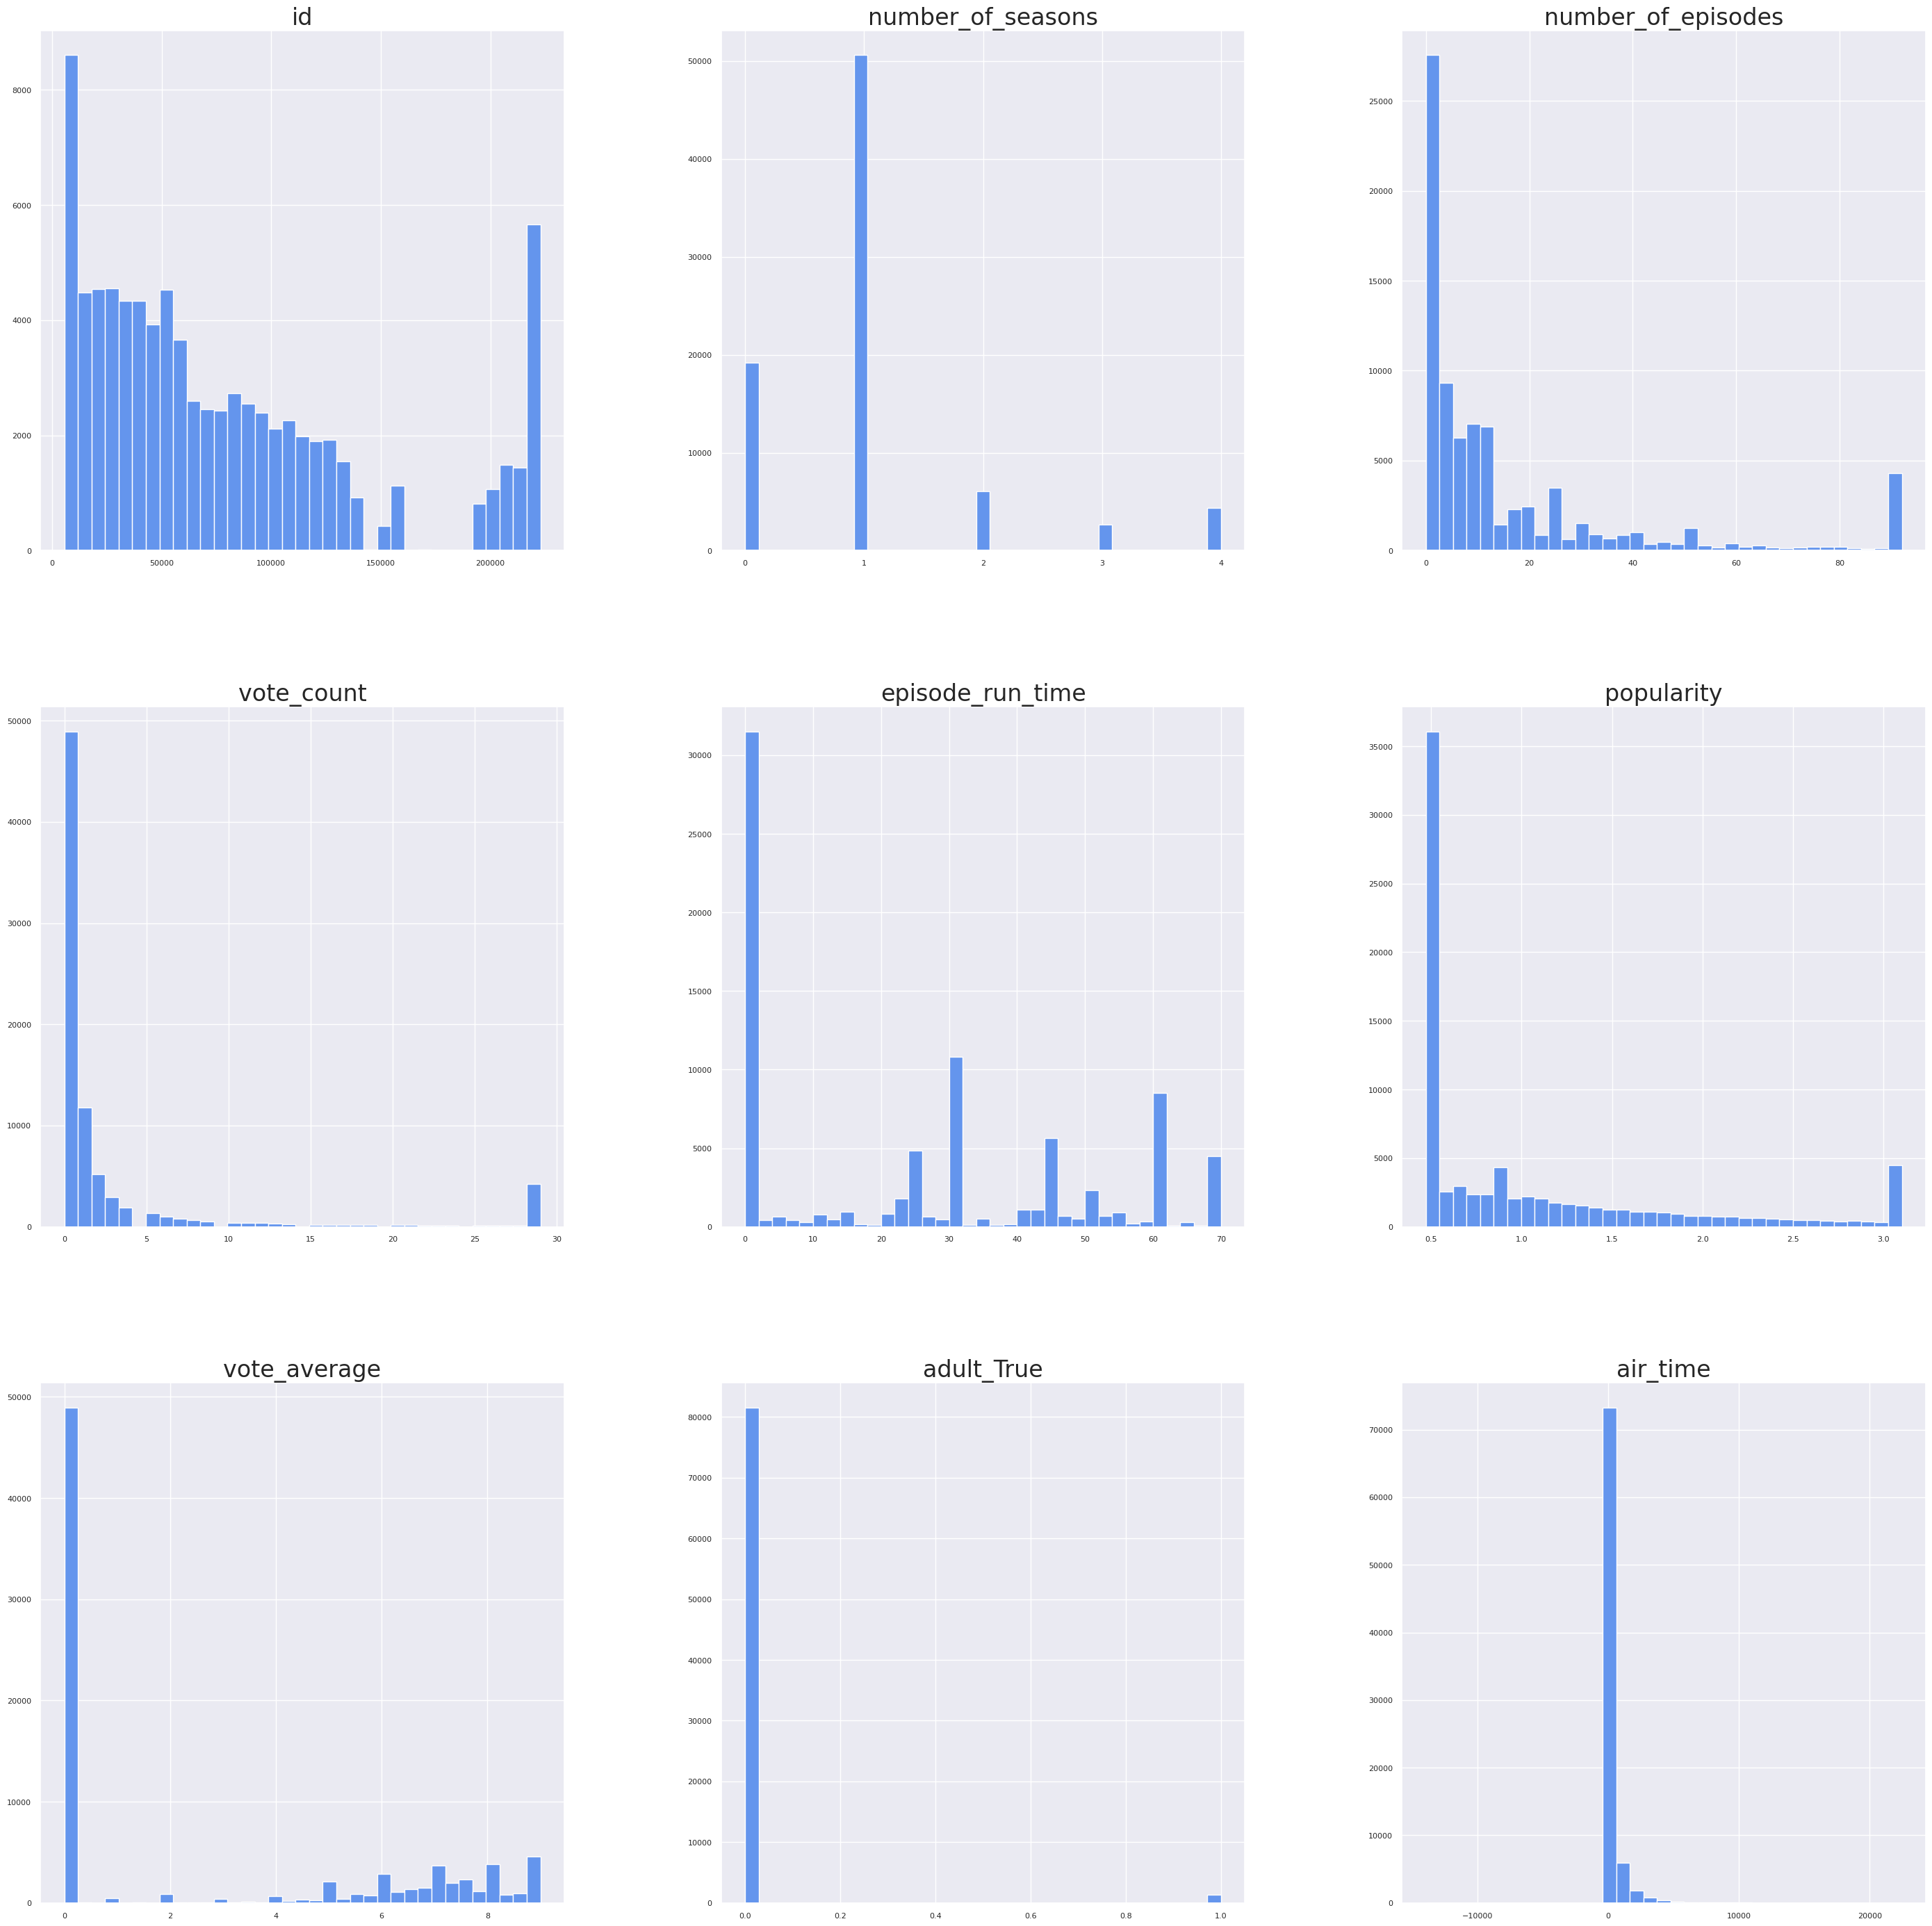

In [5]:
# Convert specified columns to float
columns_to_convert = ['id','number_of_seasons', 'number_of_episodes', 'vote_count', 'episode_run_time','popularity','vote_average','adult_True','air_time']
tmdb_num = tmdb_clean[columns_to_convert].astype(float)
tmdb_num.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "cornflowerblue");

# Skeuness

In [6]:
import pandas as pd # Make sure pandas is imported
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(tmdb_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight) # Use pd.DataFrame instead of tmdb_num.DataFrame

<ipython-input-6-aab235dd264a>:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(tmdb_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight) # Use pd.DataFrame instead of tmdb_num.DataFrame


,skewness
air_time,8.240643
adult_True,7.657251
vote_count,2.908726
number_of_episodes,2.052569
number_of_seasons,1.569289
popularity,1.369761
id,1.004070
vote_average,0.609859
episode_run_time,0.368277


# Correlation

In [7]:
# TMDB Dataset Corrolation
tmdb_num.corr()

,id,number_of_seasons,number_of_episodes,vote_count,episode_run_time,popularity,vote_average,adult_True,air_time
id,1.000000,0.052023,-0.027372,-0.093855,-0.180271,-0.074788,-0.028323,0.070598,-0.111811
number_of_seasons,0.052023,1.000000,0.617437,0.320364,0.200333,0.477674,0.335805,0.004958,0.513984
number_of_episodes,-0.027372,0.617437,1.000000,0.283179,0.117440,0.630807,0.273664,-0.070457,0.421919
vote_count,-0.093855,0.320364,0.283179,1.000000,0.192190,0.648150,0.527995,-0.028750,0.189400
episode_run_time,-0.180271,0.200333,0.117440,0.192190,1.000000,0.248189,0.246745,-0.057744,0.071126
popularity,-0.074788,0.477674,0.630807,0.648150,0.248189,1.000000,0.524020,-0.096050,0.289682
vote_average,-0.028323,0.335805,0.273664,0.527995,0.246745,0.524020,1.000000,0.034296,0.163347
adult_True,0.070598,0.004958,-0.070457,-0.028750,-0.057744,-0.096050,0.034296,1.000000,-0.004273
air_time,-0.111811,0.513984,0.421919,0.189400,0.071126,0.289682,0.163347,-0.004273,1.000000


In [8]:
# [['name','first_air_date','last_air_date','geners','created_by','languages','networks','origin_country','production_companies','air_time']]
tmdb_test2 = tmdb_clean.copy()

tmdb_test2['name_na'] = 0
tmdb_test2.loc[(tmdb_test2['name'].isnull()),['name_na']] = 1

tmdb_test2['first_air_date_na'] = 0
tmdb_test2.loc[(tmdb_test2['first_air_date'].isnull()),['first_air_date_na']] = 1

tmdb_test2['last_air_date_na'] = 0
tmdb_test2.loc[(tmdb_test2['last_air_date'].isnull()),['last_air_date_na']] = 1

tmdb_test2['genres_na'] = 0
tmdb_test2.loc[(tmdb_test2['genres'].isnull()),['genres_na']] = 1

tmdb_test2['created_by_na'] = 0
tmdb_test2.loc[(tmdb_test2['created_by'].isnull()),['created_by_na']] = 1

tmdb_test2['languages_na'] = 0
tmdb_test2.loc[(tmdb_test2['languages'].isnull()),['languages_na']] = 1

tmdb_test2['networks_na'] = 0
tmdb_test2.loc[(tmdb_test2['networks'].isnull()),['networks_na']] = 1

tmdb_test2['origin_country_na'] = 0
tmdb_test2.loc[(tmdb_test2['origin_country'].isnull()),['origin_country_na']] = 1

tmdb_test2['production_companies_na'] = 0
tmdb_test2.loc[(tmdb_test2['production_companies'].isnull()),['production_companies_na']] = 1

tmdb_test2['air_time_na'] = 0
tmdb_test2.loc[(tmdb_test2['air_time'].isnull()),['air_time_na']] = 1

tmdb_test2.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,...,name_na,first_air_date_na,last_air_date_na,genres_na,created_by_na,languages_na,networks_na,origin_country_na,production_companies_na,air_time_na
0,minutes,39280.0,0,0,0,0.0,NaT,NaT,0.470004,Scripted,...,0,1,1,0,0,0,0,0,0,0
1,man,222838.6,1,5,3,7.7,2023-05-28,2023-06-25,1.723837,Scripted,...,0,0,0,0,0,0,0,0,0,0
2,erne tur retur,222838.6,1,10,0,0.0,2014-05-15,2014-07-17,0.470004,Scripted,...,0,0,0,0,0,0,0,0,0,0
3,,34835.0,1,12,10,6.4,2006-10-06,2006-12-22,2.375928,Scripted,...,0,0,0,0,0,0,0,0,0,0
4,bama,42598.0,0,0,0,0.0,NaT,NaT,0.470004,Scripted,...,0,1,1,0,0,0,0,0,0,0


Convert categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. This typically involves creating binary columns for each category in a categorical feature.

#Label Encoding

Update to tmdb_hot Dataset

In [9]:
from sklearn.preprocessing import LabelEncoder

tmdb_hot=tmdb_clean.copy()

# Identify object (categorical) columns
categorical_cols = tmdb_hot.select_dtypes(include=['object','category']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    tmdb_hot[col] = le.fit_transform(tmdb_clean[col])
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  int64         
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  int64         
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

# Corroletion TMDB Dataset

In [10]:
tmdb_hot.corr(method='spearman')

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,adult_True,air_time
name,1.000000,0.111614,0.016218,0.031481,-0.036756,-0.023594,0.041009,0.041738,-0.029708,0.016925,0.011020,0.041743,0.079813,0.058847,-0.032867,-0.001932,-0.045493,0.016290,-0.045558
id,0.111614,1.000000,0.189527,0.150214,-0.030745,0.017624,0.590704,0.579017,0.029137,-0.281620,-0.045722,0.015039,0.289449,0.125091,-0.240126,-0.072837,-0.175727,0.100052,-0.284278
number_of_seasons,0.016218,0.189527,1.000000,0.782948,0.412011,0.380716,0.526540,0.574318,0.580289,-0.120479,-0.159580,-0.192003,0.186078,-0.218570,-0.225131,-0.091767,0.259537,0.031562,0.311028
number_of_episodes,0.031481,0.150214,0.782948,1.000000,0.425688,0.389309,0.462450,0.495158,0.699144,0.024053,-0.109418,-0.192770,0.271448,-0.204371,-0.233376,-0.181556,0.235295,-0.070230,0.445596
vote_count,-0.036756,-0.030745,0.412011,0.425688,1.000000,0.920742,0.343664,0.362134,0.651651,-0.048470,-0.155568,-0.242763,0.231167,-0.237986,-0.049419,-0.078904,0.283324,0.010248,0.193278
vote_average,-0.023594,0.017624,0.380716,0.389309,0.920742,1.000000,0.335047,0.349979,0.563776,-0.062780,-0.146235,-0.204856,0.234208,-0.200897,-0.066070,-0.083452,0.252656,0.035084,0.155639
first_air_date,0.041009,0.590704,0.526540,0.462450,0.343664,0.335047,1.000000,0.976869,0.388986,-0.315865,-0.136682,-0.094524,0.360837,-0.085178,-0.263265,-0.070959,0.170484,0.058894,-0.170531
last_air_date,0.041738,0.579017,0.574318,0.495158,0.362134,0.349979,0.976869,1.000000,0.409233,-0.301818,-0.137224,-0.103292,0.356088,-0.081527,-0.262342,-0.064818,0.170001,0.056540,-0.103136
popularity,-0.029708,0.029137,0.580289,0.699144,0.651651,0.563776,0.388986,0.409233,1.000000,-0.011800,-0.116406,-0.259162,0.255382,-0.299984,-0.141678,-0.177665,0.319757,-0.138718,0.286875
type,0.016925,-0.281620,-0.120479,0.024053,-0.048470,-0.062780,-0.315865,-0.301818,-0.011800,1.000000,0.054452,0.014187,0.033449,0.102171,0.098430,-0.012814,-0.071036,0.112547,0.276632


# HeatMap Dataset

<Axes: >

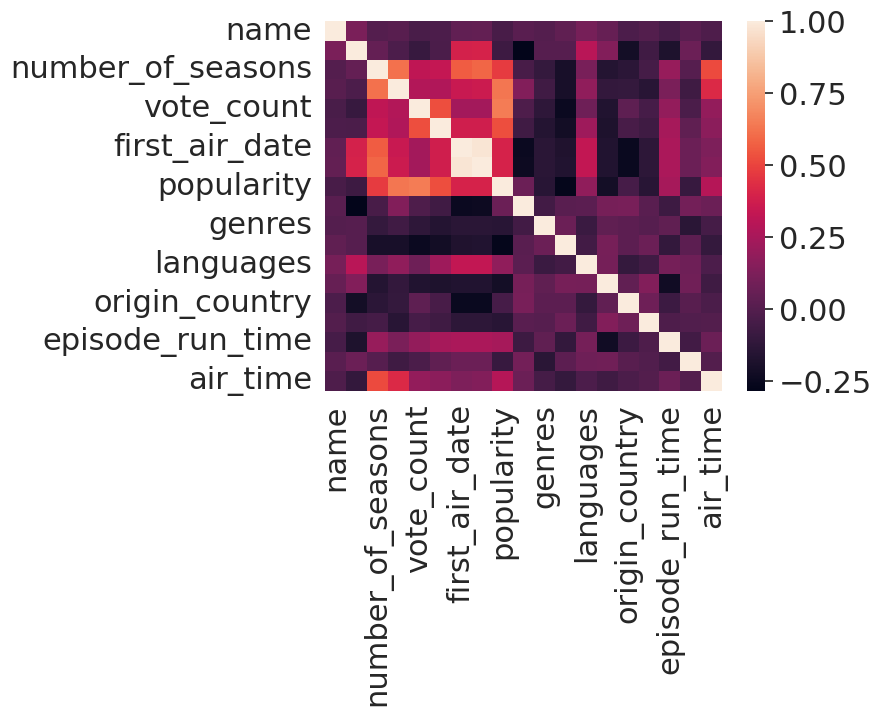

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(tmdb_hot.corr())

In [ ]:
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  int64         
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  int64         
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

In [ ]:
tmdb_hot.columns

Index(['name', 'id', 'number_of_seasons', 'number_of_episodes', 'vote_count',
       'vote_average', 'first_air_date', 'last_air_date', 'popularity', 'type',
       'genres', 'created_by', 'languages', 'networks', 'origin_country',
       'production_companies', 'episode_run_time', 'adult_True', 'air_time'],
      dtype='object')

# Chi-Square Test

#The Chi-Square Test between origin_country & production_companies

The Chi-Square test compares the observed frequencies of different combinations of categories in your data to the expected frequencies if there were no relationship between the variables. If the observed frequencies deviate significantly from the expected frequencies, it suggests that there is an association between the variables.
**Example (Correlation)**

Analyzing the correlation between a TV show's popularity and its vote average in  tmdb_eda DataFrame. If the a p-value of 0.0000 for this correlation, it means there's a statistically significant relationship between popularity and vote average.

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['production_companies', 'networks', 'languages', 'genres',
       'origin_country', 'created_by', 'type','popularity']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'production_companies')
contingency_table = pd.crosstab(df_chi['origin_country'], df_chi['production_companies'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 427019.0258
P-Value: 0.0000
Degrees of Freedom: 53452


#Chi-Square testing between origin_country & languages

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['production_companies', 'networks', 'languages', 'genres',
       'origin_country', 'created_by','type']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'spoken_languages')
contingency_table = pd.crosstab(df_chi['origin_country'], df_chi['languages'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 1631132.8568
P-Value: 0.0000
Degrees of Freedom: 20335


# The Chi-Square Test between origin_country & networks

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['production_companies', 'networks', 'languages', 'genres',
       'origin_country', 'created_by', 'type']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'networks')
contingency_table = pd.crosstab(df_chi['origin_country'], df_chi['networks'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 1520981.5661
P-Value: 0.0000
Degrees of Freedom: 106904


#Missing

In [15]:
tmdb_hot.isnull().head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,adult_True,air_time
0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

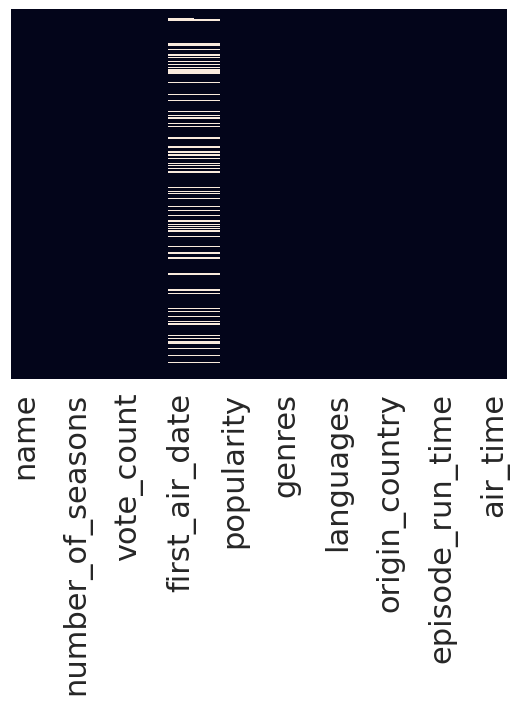

In [16]:
sns.heatmap(tmdb_hot.isnull(), yticklabels=False, cbar=False)

# Outliers that change correlation or distribution

In [17]:
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  int64         
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  int64         
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

In [18]:
tmdb_hot.corr()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,adult_True,air_time
name,1.000000,0.115044,-0.000434,0.011769,-0.034191,-0.024259,0.039244,0.043321,-0.038595,0.016646,0.001027,0.035350,0.106077,0.057397,-0.024473,-0.002671,-0.044199,0.016291,-0.017867
id,0.115044,1.000000,0.052023,-0.027372,-0.093855,-0.028323,0.389855,0.393979,-0.074788,-0.283009,0.005915,0.003238,0.299597,0.142814,-0.212946,-0.063596,-0.180271,0.070598,-0.111811
number_of_seasons,-0.000434,0.052023,1.000000,0.617437,0.320364,0.335805,0.561971,0.587162,0.477674,-0.038411,-0.106353,-0.198420,0.109545,-0.162652,-0.136099,-0.048742,0.200333,0.004958,0.513984
number_of_episodes,0.011769,-0.027372,0.617437,1.000000,0.283179,0.273664,0.350055,0.362556,0.630807,0.140561,-0.066362,-0.201673,0.182785,-0.107869,-0.105669,-0.143762,0.117440,-0.070457,0.421919
vote_count,-0.034191,-0.093855,0.320364,0.283179,1.000000,0.527995,0.234240,0.233571,0.648150,-0.022123,-0.125378,-0.245848,0.078800,-0.168123,0.028892,-0.044766,0.192190,-0.028750,0.189400
vote_average,-0.024259,-0.028323,0.335805,0.273664,0.527995,1.000000,0.376439,0.376258,0.524020,-0.063876,-0.161303,-0.221457,0.219707,-0.180560,-0.037988,-0.069401,0.246745,0.034296,0.163347
first_air_date,0.039244,0.389855,0.561971,0.350055,0.234240,0.376439,1.000000,0.978315,0.395054,-0.245631,-0.140284,-0.172953,0.330974,-0.171415,-0.248090,-0.130961,0.259536,0.071357,0.127050
last_air_date,0.043321,0.393979,0.587162,0.362556,0.233571,0.376258,0.978315,1.000000,0.397352,-0.241668,-0.138638,-0.172308,0.330504,-0.169180,-0.249290,-0.128955,0.259553,0.071552,0.142152
popularity,-0.038595,-0.074788,0.477674,0.630807,0.648150,0.524020,0.395054,0.397352,1.000000,0.068219,-0.144515,-0.272729,0.178310,-0.215844,-0.044980,-0.143683,0.248189,-0.096050,0.289682
type,0.016646,-0.283009,-0.038411,0.140561,-0.022123,-0.063876,-0.245631,-0.241668,0.068219,1.000000,-0.061878,0.014554,0.021901,0.105001,0.112157,0.014369,-0.073601,0.093150,0.068360


# Correlation with Outliers

In [19]:
import numpy as np
from scipy import stats

# Convert 'first_air_date' and 'last_air_date' to numerical representation
for col in ['first_air_date', 'last_air_date']:
    if tmdb_hot[col].dtype == 'datetime64[ns]':
        tmdb_hot[col] = tmdb_hot[col].astype(np.int64)  # Convert to numerical

# Calculate correlations with outliers
correlation_with_outliers = tmdb_hot.corr()
# Calculate correlations with outliers
outlier_threshold = 2.5  # Adjust as needed
# Find indices of outliers
outlier_indices = np.where(np.abs(stats.zscore(tmdb_hot.select_dtypes(include=np.number))) > outlier_threshold) #Only calculate zscore for numerical features.
print("Correlation with Outliers:")
print(correlation_with_outliers)

Correlation with Outliers:
                          name        id  number_of_seasons  \
name                  1.000000  0.115044          -0.000434   
id                    0.115044  1.000000           0.052023   
number_of_seasons    -0.000434  0.052023           1.000000   
number_of_episodes    0.011769 -0.027372           0.617437   
vote_count           -0.034191 -0.093855           0.320364   
vote_average         -0.024259 -0.028323           0.335805   
first_air_date        0.039244  0.389855           0.561971   
last_air_date         0.043321  0.393979           0.587162   
popularity           -0.038595 -0.074788           0.477674   
type                  0.016646 -0.283009          -0.038411   
genres                0.001027  0.005915          -0.106353   
created_by            0.035350  0.003238          -0.198420   
languages             0.106077  0.299597           0.109545   
networks              0.057397  0.142814          -0.162652   
origin_country       -0.0244

# Heatmap-Correlation with Outliers

<Axes: >

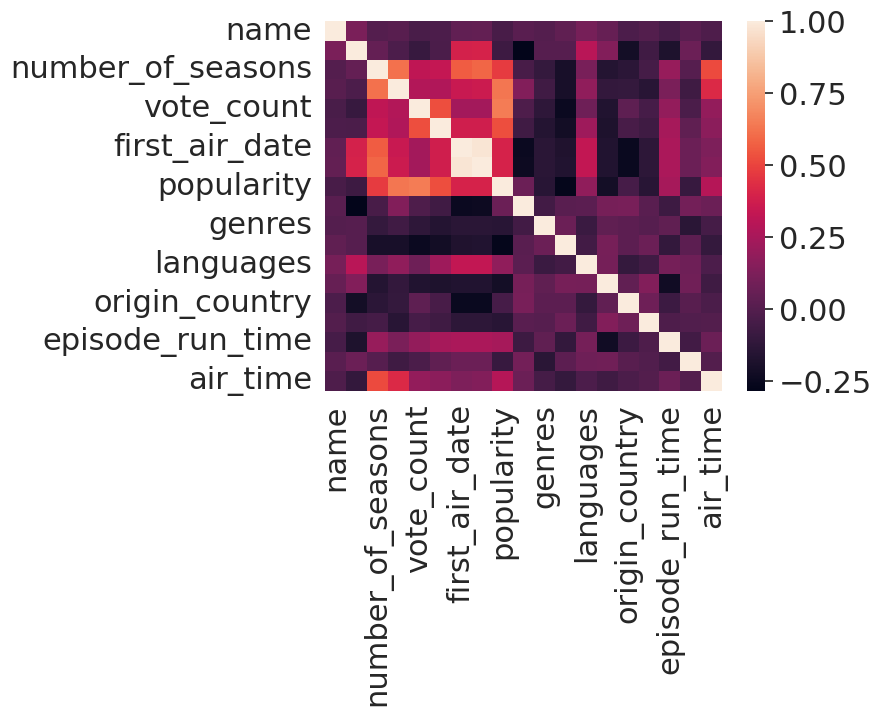

In [20]:
sns.heatmap(correlation_with_outliers)

# Analysing outliers that change either correlation or distribution

In [21]:
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  82872 non-null  int64  
 1   id                    82872 non-null  float64
 2   number_of_seasons     82872 non-null  int64  
 3   number_of_episodes    82872 non-null  int64  
 4   vote_count            82872 non-null  int64  
 5   vote_average          82872 non-null  float64
 6   first_air_date        82872 non-null  int64  
 7   last_air_date         82872 non-null  int64  
 8   popularity            82872 non-null  float64
 9   type                  82872 non-null  int64  
 10  genres                82872 non-null  int64  
 11  created_by            82872 non-null  int64  
 12  languages             82872 non-null  int64  
 13  networks              82872 non-null  int64  
 14  origin_country        82872 non-null  int64  
 15  production_companie

In [22]:
# Initialize a list to store outliers that change either correlation or distribution
outliers_change_corr_or_dist = []

# Create a copy of the original index to avoid the error
original_index = tmdb_hot.index

# Iterate through each column and find outliers that change correlation or distribution
for column in tmdb_hot.columns:
    if column == "number_of_seasons":
        continue

    # Find indices of outliers using the original index
    outlier_indices = np.where(np.abs(stats.zscore(tmdb_hot[column])) > outlier_threshold)

    # Calculate correlation without the outliers
    df_no_outliers = tmdb_hot.drop(index=original_index[outlier_indices[0]]) # Use original_index to drop rows
    correlation_without_outliers = df_no_outliers.corr()

    # Compare correlations and check if distribution changes
    if not np.allclose(correlation_with_outliers, correlation_without_outliers, rtol=0.05) or not np.array_equal(correlation_with_outliers, correlation_without_outliers):
        outliers_change_corr_or_dist.extend(outlier_indices[0])

# Remove duplicates from the list
outliers_change_corr_or_dist = list(set(outliers_change_corr_or_dist))

# Print the outliers that change either correlation or distribution
print("Outliers changing either correlation or distribution:", outliers_change_corr_or_dist)

Outliers changing either correlation or distribution: [32768, 32769, 32771, 32772, 65541, 32775, 32776, 65546, 65548, 13, 32782, 12, 65556, 32788, 65557, 65560, 65562, 32795, 65564, 32796, 28, 31, 65569, 65570, 32803, 65574, 65575, 38, 41, 42, 32811, 44, 32812, 65580, 65583, 65584, 50, 51, 65587, 65589, 32819, 32820, 57, 59, 60, 32829, 65598, 32831, 65599, 65603, 65604, 65606, 32838, 72, 65608, 32843, 32844, 32846, 65617, 83, 85, 86, 32857, 94, 96, 97, 32867, 100, 32868, 32870, 32871, 104, 105, 102, 108, 32877, 65645, 109, 65653, 65654, 32887, 65655, 32885, 32890, 65658, 32888, 32892, 32897, 32899, 32900, 32902, 135, 136, 65673, 32906, 32907, 65676, 32909, 142, 32911, 32912, 65677, 32914, 65683, 32916, 32908, 32910, 65687, 65685, 154, 32923, 32927, 65696, 32929, 162, 163, 32928, 65701, 65697, 32935, 65704, 169, 32937, 65702, 65710, 175, 32942, 32943, 65714, 178, 65715, 32949, 65722, 186, 187, 189, 190, 188, 65728, 32961, 32960, 65731, 39, 199, 39117, 201, 32968, 32972, 65741, 65742, 20

# Remove outliers changing either correlation or distribution from the DataFrame

In [23]:
# Remove outliers changing either correlation or distribution from the DataFrame

tmdb_filtered = tmdb_hot.drop(index=tmdb_hot.index[outliers_change_corr_or_dist]) # Use tmdb_hot.index to get correct labels
#if there were any unnacesary outliers, they are now cleaned
tmdb_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63834 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  63834 non-null  int64  
 1   id                    63834 non-null  float64
 2   number_of_seasons     63834 non-null  int64  
 3   number_of_episodes    63834 non-null  int64  
 4   vote_count            63834 non-null  int64  
 5   vote_average          63834 non-null  float64
 6   first_air_date        63834 non-null  int64  
 7   last_air_date         63834 non-null  int64  
 8   popularity            63834 non-null  float64
 9   type                  63834 non-null  int64  
 10  genres                63834 non-null  int64  
 11  created_by            63834 non-null  int64  
 12  languages             63834 non-null  int64  
 13  networks              63834 non-null  int64  
 14  origin_country        63834 non-null  int64  
 15  production_companies  63

# Save as pikle file to my Google Drive





In [24]:
# Import necessary libraries
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_filtered DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_filtered, file)
  print(f"tmdb_filtered saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_filtered is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_filtered saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl


# Importing Pickel file tmdb_filtered

In [25]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_filtered = pickle.load(file)
    print(f"tmdb_filtered loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_filtered
    # For example, you can display the first few rows:
    print(tmdb_filtered.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_filtered loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl successfully.
   name        id  number_of_seasons  number_of_episodes  vote_count  \
0    11   39280.0                  0                   0           0   
1    43  222838.6                  1                   5           3   
2   279  222838.6                  1                  10           0   
3     1   34835.0                  1                  12          10   
4  5774   42598.0                  0                   0           0   

   vote_average       first_air_date        last_air_date  popularity  type  \
0           0.0 -9223372036854775808 -9223372036854775808    0.470004     4   
1           7.7  1685232000000000000  1687651200000000000    1.723837     4   
2           0.0  1400112000000000000  1405555200000000000    0.470004     4   
3     

# The tmdb_filtered Analysis

In [26]:
tmdb_filtered.head(10)

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,adult_True,air_time
0,11,39280.00,0,0,0,0.0,-9223372036854775808,-9223372036854775808,0.470004,4,40,13284,7,178,511,86,30,0,56.0
1,43,222838.60,1,5,3,7.7,1685232000000000000,1687651200000000000,1.723837,4,40,13302,20,169,361,86,50,0,28.0
2,279,222838.60,1,10,0,0.0,1400112000000000000,1405555200000000000,0.470004,4,40,13284,7,178,206,86,0,0,63.0
3,1,34835.00,1,12,10,6.4,1160092800000000000,1166745600000000000,2.375928,4,58,13284,20,178,361,86,30,0,77.0
4,5774,42598.00,0,0,0,0.0,-9223372036854775808,-9223372036854775808,0.470004,4,21,13284,7,178,511,86,0,0,56.0
5,0,5623.55,0,0,0,0.0,-9223372036854775808,-9223372036854775808,0.470004,4,40,13284,7,22,101,86,0,0,56.0
6,0,53608.00,0,0,0,0.0,-9223372036854775808,-9223372036854775808,0.470004,4,40,13284,0,178,224,86,0,0,56.0
7,0,222838.60,1,3,0,0.0,1630281600000000000,1630454400000000000,0.622725,0,36,13284,7,178,511,86,0,0,2.0
8,50436,57291.00,0,0,0,0.0,-9223372036854775808,-9223372036854775808,0.470004,4,40,13284,7,178,511,86,0,0,56.0
9,59335,60387.00,0,1,0,0.0,-9223372036854775808,1381017600000000000,0.470004,4,40,13284,7,178,511,86,0,0,56.0


# Dataset tmdb.filtered Describe

In [27]:
tmdb_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
name,63834.0,4.141119e+04,2.404672e+04,0.000000e+00,2.053625e+04,4.140550e+04,6.235175e+04,8.242800e+04
id,63834.0,7.904712e+04,6.476505e+04,5.623550e+03,2.888825e+04,5.680150e+04,1.113480e+05,2.228386e+05
number_of_seasons,63834.0,8.737663e-01,7.810719e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
number_of_episodes,63834.0,9.819924e+00,1.330799e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.300000e+01,7.500000e+01
vote_count,63834.0,1.064339e+00,2.609472e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+01
vote_average,63834.0,2.149506e+00,3.295694e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.500000e+00,9.000000e+00
first_air_date,63834.0,-1.999530e+18,4.801012e+18,-9.223372e+18,-9.223372e+18,1.057018e+18,1.426118e+18,1.713830e+18
last_air_date,63834.0,-1.912989e+18,4.775253e+18,-9.223372e+18,-9.223372e+18,1.089245e+18,1.445299e+18,1.712189e+18
popularity,63834.0,8.208193e-01,5.116677e-01,4.700036e-01,4.700036e-01,5.086232e-01,1.014143e+00,3.020522e+00
type,63834.0,3.358492e+00,1.368525e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00


In [28]:
tmdb_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63834 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  63834 non-null  int64  
 1   id                    63834 non-null  float64
 2   number_of_seasons     63834 non-null  int64  
 3   number_of_episodes    63834 non-null  int64  
 4   vote_count            63834 non-null  int64  
 5   vote_average          63834 non-null  float64
 6   first_air_date        63834 non-null  int64  
 7   last_air_date         63834 non-null  int64  
 8   popularity            63834 non-null  float64
 9   type                  63834 non-null  int64  
 10  genres                63834 non-null  int64  
 11  created_by            63834 non-null  int64  
 12  languages             63834 non-null  int64  
 13  networks              63834 non-null  int64  
 14  origin_country        63834 non-null  int64  
 15  production_companies  63

In [29]:
tmdb_filtered.head(3)

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,adult_True,air_time
0,11,39280.0,0,0,0,0.0,-9223372036854775808,-9223372036854775808,0.470004,4,40,13284,7,178,511,86,30,0,56.0
1,43,222838.6,1,5,3,7.7,1685232000000000000,1687651200000000000,1.723837,4,40,13302,20,169,361,86,50,0,28.0
2,279,222838.6,1,10,0,0.0,1400112000000000000,1405555200000000000,0.470004,4,40,13284,7,178,206,86,0,0,63.0


In [30]:
tmdb_filtered.agg('count')

,0
name,63834
id,63834
number_of_seasons,63834
number_of_episodes,63834
vote_count,63834
vote_average,63834
first_air_date,63834
last_air_date,63834
popularity,63834
type,63834


# Analizing  DataSet tmdb_filtered

<ipython-input-31-008abf01e601>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmdb_filtered['log_popularity'], kde=True)  # kde=True shows the kernel density estimate


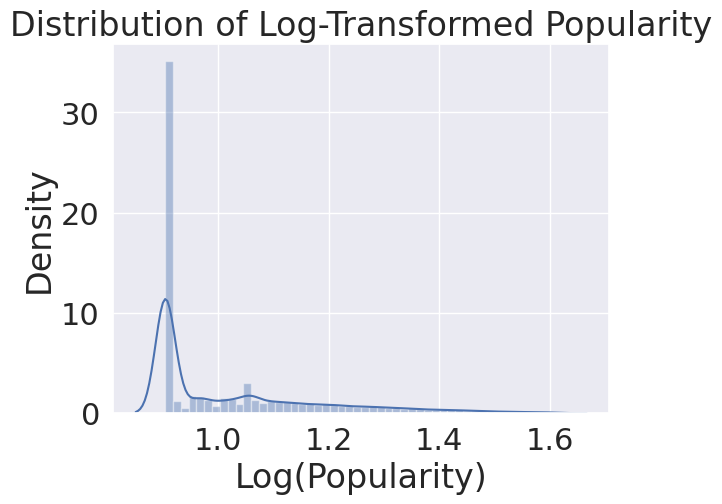

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Using  tmdb_filtered as the  DataFrame

# Apply log transformation to 'popularity' and handle potential zeros or negative values
tmdb_filtered['log_popularity'] = np.log1p(1+tmdb_filtered['popularity'])  # log1p(x) = log(1 + x)

# Create the distplot
sns.distplot(tmdb_filtered['log_popularity'], kde=True)  # kde=True shows the kernel density estimate
plt.title('Distribution of Log-Transformed Popularity')
plt.xlabel('Log(Popularity)')
plt.ylabel('Density')
plt.show()


# Feature Eng. & Selection

**Hyperparameters**

# Multivariable Analysis
**Summarization and Selection of Variables**

The Lasso penalty here is controlled by alpha = 0.01. This penalty forces some coefficients to shrink to zero, effectively performing feature selection. A higher penalty (larger alpha) would result in more coefficients being zeroed out, and a lower penalty (smaller alpha) would retain more features

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge

In [34]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor # Changed to Regressors
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Import LinearSVR for regression tasks
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge


# Assuming 'tmdb_filtered' is your DataFrame containing the features and target variable
# Replace 'target_variable_column' with the actual name of your target variable column
X = tmdb_filtered.drop(columns=['popularity'])  # Features (all columns except the target)
y = tmdb_filtered['popularity']  # Target variable

# Fit models and determine if a feature is selected (1) or not (0)
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

# Fit Ridge model
ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

# Use LinearSVR for regression with continuous target
svm = LinearSVR(C=0.01).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

gb = GradientBoostingRegressor().fit(X, y) # Changed to Regressor
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestRegressor().fit(X, y) # Changed to Regressor
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest','Ridge']].sum(axis=1)

# Output the results
print(selection_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.854e+03, tolerance: 1.671e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.44183e-45): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                 Feature  Lasso  SVM  GradientBoost  RandomForest  Ridge  Sum
0                   name      1    1              0             1      1    4
1                     id      1    1              0             1      1    4
2      number_of_seasons      0    1              0             1      1    3
3     number_of_episodes      1    1              0             1      1    4
4             vote_count      1    1              0             1      1    4
5           vote_average      1    1              0             1      1    4
6         first_air_date      1    1              0             1      1    4
7          last_air_date      1    1              0             1      1    4
8                   type      0    1              0             1      1    3
9                 genres      1    1              0             1      1    4
10            created_by      1    1              1             1      1    5
11             languages      1    1              0             

# Creating DataFrame with most valuable variables

Selected variables - recommended by 4 or more models

In [35]:
 #Selecting variables with a sum of selections >= 4
final_var = selection_df[selection_df['Sum'] >= 4]['Feature'].tolist()
tmdb_model = tmdb_filtered[final_var].copy()
tmdb_model['popularity'] = tmdb_filtered['popularity'].copy()

# Output the result to verify
tmdb_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63834 entries, 0 to 82871
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  63834 non-null  int64  
 1   id                    63834 non-null  float64
 2   number_of_episodes    63834 non-null  int64  
 3   vote_count            63834 non-null  int64  
 4   vote_average          63834 non-null  float64
 5   first_air_date        63834 non-null  int64  
 6   last_air_date         63834 non-null  int64  
 7   genres                63834 non-null  int64  
 8   created_by            63834 non-null  int64  
 9   languages             63834 non-null  int64  
 10  networks              63834 non-null  int64  
 11  origin_country        63834 non-null  int64  
 12  production_companies  63834 non-null  int64  
 13  episode_run_time      63834 non-null  int64  
 14  air_time              63834 non-null  float64
 15  log_popularity        63

# Imbalanced techniques

**Setting proportion for Train, Test, Dev**

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings("ignore")

In [37]:
from sklearn.model_selection import train_test_split

# Assuming df_model is already defined and contains the necessary features and target variable

# Define the target and feature set
X = tmdb_model.drop(columns=['popularity'])
y = tmdb_model['popularity']

# Total number of samples
total_samples = len(tmdb_model)

# First split: training and temporary (test + dev)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: testing and development (dev)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Calculate percentages
train_percent = (X_train.shape[0] / total_samples) * 100
dev_percent = (X_dev.shape[0] / total_samples) * 100
test_percent = (X_test.shape[0] / total_samples) * 100

# Output the sizes of each set in percentages
print(f"Training set size: {train_percent:.2f}%")
print(f"Validation (Dev) set size: {dev_percent:.2f}%")
print(f"Testing set size: {test_percent:.2f}%")

Training set size: 70.00%
Validation (Dev) set size: 15.00%
Testing set size: 15.00%


In [38]:
techniques = {
    "ROS": RandomOverSampler(random_state=47),
    "RUS": RandomUnderSampler(random_state=47),
    "SMOTE": SMOTE(random_state=47),
    "SMOTETomek": SMOTETomek(random_state=47)
}

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tmdb_model, tmdb_model.popularity, test_size=0.35, random_state=47)

# Define the classification metrics function
def classificationMetrics(y, yhat):
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
    return metrics


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Import a regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import regression metrics

# Using 'tmdb_model' is your DataFrame with features and 'popularity' is the target
X_train, X_test, y_train, y_test = train_test_split(
    tmdb_model.drop('popularity', axis=1),  # Features (excluding popularity)
    tmdb_model['popularity'],  # Target variable
    test_size=0.35,
    random_state=47
)

# Define the regression metrics function
def regressionMetrics(y_true, y_pred):
    """
    Calculate and return regression metrics.

    Args:
        y_true: True target values.
        y_pred: Predicted target values.

    Returns:
        dict: A dictionary containing the calculated regression metrics.
    """
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "R-squared (R2)": r2_score(y_true, y_pred),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred)
    }
    return metrics

# Train a Linear Regression model (example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
results = regressionMetrics(y_test, y_pred)
print(results)

{'Mean Squared Error (MSE)': 0.21215416969809017, 'R-squared (R2)': 0.18194083258251703, 'Mean Absolute Error (MAE)': 0.31288521196283986}


In [41]:
tmdb_model.columns

Index(['name', 'id', 'number_of_episodes', 'vote_count', 'vote_average',
       'first_air_date', 'last_air_date', 'genres', 'created_by', 'languages',
       'networks', 'origin_country', 'production_companies',
       'episode_run_time', 'air_time', 'log_popularity', 'popularity'],
      dtype='object')

# Download & Save tmdb_eng to my Google Drive

In [42]:
# Import necessary libraries
import pickle
from google.colab import drive

# Save tmdb_filtered as tmdb_eng

tmdb_eng=tmdb_model

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eng.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_ready DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_eng, file)
  print(f"tmdb_eng saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_eng is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_eng saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eng.pkl


#Importing Pickel file tmdb_eng from my Google Drive

In [43]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eng.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_eng = pickle.load(file)
    print(f"tmdb_eng loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_ready)
    # For example, you can display the first few rows:
    print(tmdb_eng.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_eng loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eng.pkl successfully.
   name        id  number_of_episodes  vote_count  vote_average  \
0    11   39280.0                   0           0           0.0   
1    43  222838.6                   5           3           7.7   
2   279  222838.6                  10           0           0.0   
3     1   34835.0                  12          10           6.4   
4  5774   42598.0                   0           0           0.0   

        first_air_date        last_air_date  genres  created_by  languages  \
0 -9223372036854775808 -9223372036854775808      40       13284          7   
1  1685232000000000000  1687651200000000000      40       13302         20   
2  1400112000000000000  1405555200000000000      40       13284          7   
3  1160092800000000000  1166745600000000000      5